In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/AdrianPauer/PRIDAV

Cloning into 'PRIDAV'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 64 (delta 15), reused 4 (delta 1), pack-reused 30
Receiving objects: 100% (64/64), 59.50 MiB | 5.57 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Updating files: 100% (9/9), done.


##Dáta

In [2]:
ratings = pd.read_table('PRIDAV/title_ratings_scraped.tsv', delimiter='\t', na_values = '\\N')
basic = pd.read_table('PRIDAV/title_basics_scraped.tsv', delimiter='\t', na_values = '\\N')
akas = pd.read_table('PRIDAV/title_akas_scraped.tsv', delimiter='\t', na_values = '\\N')
crew = pd.read_table('PRIDAV/title_crew_scraped.tsv', delimiter='\t', na_values = '\\N')
principals = pd.read_table('PRIDAV/title_principals_scraped.tsv', delimiter='\t', na_values = '\\N')
persons = pd.read_table('PRIDAV/name_basics_scraped.tsv', delimiter='\t', na_values = '\\N')

In [3]:
titles = pd.merge(pd.merge(basic,crew, on = 'tconst'),ratings, on = 'tconst')
titles

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
0,tt0000001,short,Carmencita,1894.0,1.0,"Documentary,Short",nm0005690,NaN,5.7,2009
1,tt0000011,short,Akrobatisches Potpourri,1895.0,1.0,"Documentary,Short",nm0804434,NaN,5.2,378
2,tt0000022,short,Blacksmith Scene,1895.0,1.0,"Documentary,Short",nm0525910,NaN,5.1,1117
3,tt0000032,short,Die Serpentintänzerin,1895.0,1.0,Short,nm0804434,NaN,5.0,428
4,tt0000042,short,Bateau-mouche sur la Seine,1896.0,NaN,"Documentary,Short",nm0617588,NaN,4.1,38
...,...,...,...,...,...,...,...,...,...,...
138209,tt9916120,tvEpisode,The Evolution of the Bellas,2019.0,NaN,Reality-TV,NaN,NaN,5.2,13
138210,tt9916220,tvEpisode,Episode dated 18 May 1988,1988.0,NaN,"Crime,Documentary,Drama",NaN,NaN,7.2,23
138211,tt9916428,movie,The Secret of China,2019.0,NaN,"Adventure,History,War",nm0910951,NaN,3.5,17
138212,tt9916578,tvEpisode,The Trial of Joan Collins,2019.0,44.0,"Adventure,Biography,Comedy",nm0373673,"nm1485603,nm1485604,nm1866876,nm0909144",7.4,47


In [4]:
# kto co robil v danom filme
principals

,tconst,nconst,category,job,characters
0,tt0000001,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,nm0005690,director,NaN,NaN
2,tt0000001,nm0374658,cinematographer,director of photography,NaN
3,tt0000011,nm3692297,actor,NaN,"[""Acrobats""]"
4,tt0000011,nm0804434,director,NaN,NaN
...,...,...,...,...,...
1150158,tt9916766,nm2563178,producer,producer,NaN
1150159,tt9916766,nm11673614,producer,producer,NaN
1150160,tt9916766,nm11673613,producer,producer,NaN
1150161,tt9916766,nm5559308,producer,producer,NaN


In [5]:
akas

,titleId,title,region,language
0,tt0000001,Карменсіта,UA,NaN
1,tt0000001,Carmencita,DE,NaN
2,tt0000001,Carmencita - spanyol tánc,HU,NaN
3,tt0000001,Καρμενσίτα,GR,NaN
4,tt0000001,Карменсита,RU,NaN
...,...,...,...,...
459984,tt9916766,Episodio #10.15,IT,it
459985,tt9916766,Folge #10.15,DE,de
459986,tt9916766,Episódio #10.15,PT,pt
459987,tt9916766,एपिसोड #10.15,IN,hi


In [6]:
# ludia pre nconst
persons

,nconst,primaryName,birthYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,"soundtrack,actor,miscellaneous","tt0031983,tt0050419,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924.0,"actress,soundtrack","tt0037382,tt0117057,tt0075213,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,"actress,soundtrack,music_department","tt0054452,tt0049189,tt0057345,tt0056404"
3,nm0000004,John Belushi,1949.0,"actor,soundtrack,writer","tt0072562,tt0080455,tt0077975,tt0078723"
4,nm0000005,Ingmar Bergman,1918.0,"writer,director,actor","tt0083922,tt0050976,tt0050986,tt0069467"
...,...,...,...,...,...
501021,nm9993410,John Branfield,NaN,writer,tt1687457
501022,nm9993445,Hiroyuki Ishiguro,NaN,producer,"tt13651628,tt8969878,tt8747870"
501023,nm9993475,Juan Sebastián Chamorro,NaN,NaN,"tt0123338,tt1244649"
501024,nm9993693,Apsara Rani,1996.0,actress,"tt8302382,tt13847502,tt8737752,tt12856788"


<Axes: >

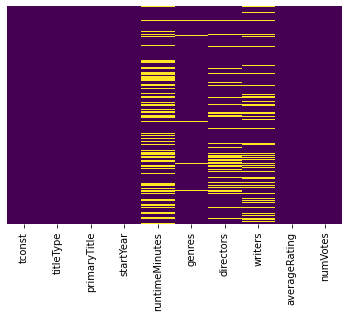

In [7]:
sns.heatmap(titles.isna(),yticklabels = False,cbar=False,cmap = 'viridis') #heatmap of missing values (yellow = NaN)

##Vplyv žánrov na obľúbenosť

In [8]:
atributes = titles[['runtimeMinutes','startYear','genres','averageRating']].dropna().reset_index(drop = True)

In [9]:
atributes

,runtimeMinutes,startYear,genres,averageRating
0,1.0,1894.0,"Documentary,Short",5.7
1,1.0,1895.0,"Documentary,Short",5.2
2,1.0,1895.0,"Documentary,Short",5.1
3,1.0,1895.0,Short,5.0
4,1.0,1896.0,"Documentary,Short",4.2
...,...,...,...,...
97278,8.0,2019.0,"Adventure,Drama,Fantasy",6.0
97279,42.0,2019.0,"Game-Show,Reality-TV",8.3
97280,97.0,2019.0,"Comedy,Drama,Fantasy",6.4
97281,44.0,2019.0,"Adventure,Biography,Comedy",7.4


In [10]:
# multi label encoding of genres
mlb = MultiLabelBinarizer()
genresEncoded = mlb.fit_transform(list(map(lambda x : x.split(','),atributes['genres'].values)))
display(genresEncoded.shape)
print(mlb.classes_)

(97283, 28)

['Action' 'Adult' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'Film-Noir' 'Game-Show'
 'History' 'Horror' 'Music' 'Musical' 'Mystery' 'News' 'Reality-TV'
 'Romance' 'Sci-Fi' 'Short' 'Sport' 'Talk-Show' 'Thriller' 'War' 'Western']


In [11]:
genres = pd.DataFrame(genresEncoded, columns = mlb.classes_)
genres['startYear'] = atributes['startYear']
genres['averageRating'] = atributes['averageRating']

# counts of filmed genres in years
counts = genres.groupby('startYear').sum().reset_index()
counts['sum'] = counts.apply(lambda x: sum(x[1:29]), axis = 1)

overalSum = counts.apply(sum, axis = 0)

#fraction of filmed genres in specific year
for genre in mlb.classes_:
  counts[genre] = counts[genre] / counts['sum']

counts.tail()

,startYear,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averageRating,sum
128,2019.0,0.063711,0.001118,0.049180,0.052534,0.012543,0.134625,0.062966,0.082961,0.173994,...,0.032538,0.013910,0.067188,0.008569,0.018256,0.029930,0.002360,0.001366,27973.6,8052.0
129,2020.0,0.049266,0.001048,0.039383,0.047320,0.012279,0.138215,0.058550,0.089698,0.172656,...,0.033693,0.011980,0.073824,0.011680,0.022612,0.032645,0.002845,0.001348,23068.0,6678.0
130,2021.0,0.057931,0.000968,0.042924,0.043569,0.014362,0.126029,0.060513,0.083589,0.186058,...,0.044860,0.013555,0.059384,0.013394,0.015975,0.037115,0.001452,0.001130,21619.9,6197.0
131,2022.0,0.052281,0.000901,0.040743,0.035875,0.017307,0.132324,0.062917,0.085812,0.197584,...,0.038760,0.013881,0.048495,0.011718,0.012079,0.046692,0.003065,0.002884,19334.8,5547.0
132,2023.0,0.067999,0.000000,0.050610,0.043602,0.014794,0.124838,0.061770,0.078121,0.195951,...,0.041786,0.012977,0.039969,0.015572,0.004153,0.046717,0.002855,0.001038,13919.7,3853.0


Text(0.5, 1.0, 'total count of filmed genre')

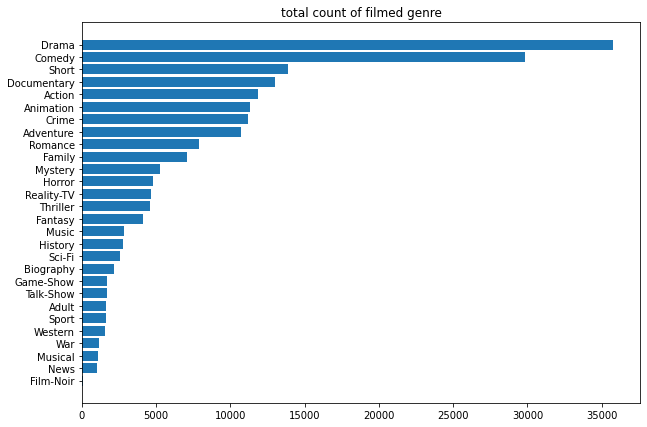

In [12]:
overalSum
overalSum = overalSum.sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (10,7))
ax.barh(np.arange(28), overalSum.values[3:])
ax.set_yticks(np.arange(28), overalSum.index[3:])
ax.invert_yaxis()
ax.set_title('total count of filmed genre')

In [13]:
# average rating for each genre
ratings = dict()
runTime = dict()
for genre in mlb.classes_:
  ratings[genre] = atributes[genres[genre] == 1]['averageRating'].mean()
  runTime[genre] = atributes[genres[genre] == 1]['runtimeMinutes'].mean()

avg = pd.DataFrame()
avg['genre'] = ratings.keys()
avg['avgRat'] = ratings.values()
avg['avgMin'] = runTime.values()
avg['count'] = overalSum[avg.genre].values

avg = avg.sort_values(by = 'avgRat')
#avg[['genre','avgRat']]

Text(0, 0.5, 'average rating')

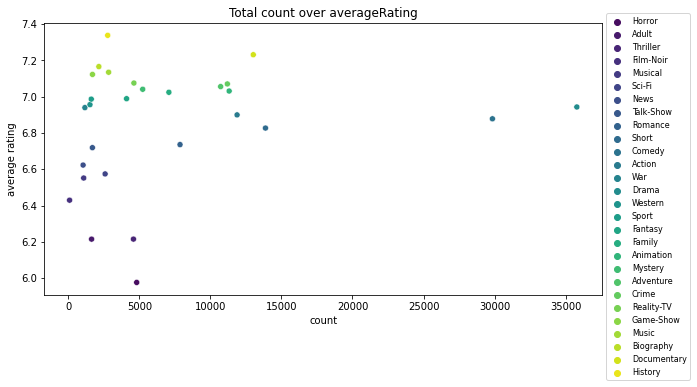

In [14]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.scatterplot(data = avg, x = 'count', y = 'avgRat', hue = 'genre', palette = "viridis", ax = ax)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,bbox_to_anchor=(1, 1.05),loc = 2,fontsize=8)
ax.set_title('Total count over averageRating')
ax.set_ylabel('average rating')

In [15]:
# regression analysis
genres['runtimeMinutes'] = atributes['runtimeMinutes']

# normalise data to z score
for clas in genres.columns:
  genres[clas] = (genres[clas] - genres[clas].mean())/genres[clas].std()
genres.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,startYear,averageRating,runtimeMinutes
0,-0.372948,-0.130946,-0.351963,-0.362918,-0.150439,-0.665277,-0.360629,2.544075,-0.762829,-0.28018,...,-0.165513,2.451594,-0.130091,-0.133322,-0.222475,-0.110379,-0.126322,-4.900430,-0.877047,-0.354163
1,-0.372948,-0.130946,-0.351963,-0.362918,-0.150439,-0.665277,-0.360629,2.544075,-0.762829,-0.28018,...,-0.165513,2.451594,-0.130091,-0.133322,-0.222475,-0.110379,-0.126322,-4.854672,-1.251557,-0.354163
2,-0.372948,-0.130946,-0.351963,-0.362918,-0.150439,-0.665277,-0.360629,2.544075,-0.762829,-0.28018,...,-0.165513,2.451594,-0.130091,-0.133322,-0.222475,-0.110379,-0.126322,-4.854672,-1.326459,-0.354163
3,-0.372948,-0.130946,-0.351963,-0.362918,-0.150439,-0.665277,-0.360629,-0.393066,-0.762829,-0.28018,...,-0.165513,2.451594,-0.130091,-0.133322,-0.222475,-0.110379,-0.126322,-4.854672,-1.401361,-0.354163
4,-0.372948,-0.130946,-0.351963,-0.362918,-0.150439,-0.665277,-0.360629,2.544075,-0.762829,-0.28018,...,-0.165513,2.451594,-0.130091,-0.133322,-0.222475,-0.110379,-0.126322,-4.808913,-2.000578,-0.354163


In [16]:
genres.describe().loc[['mean','std']]

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,startYear,averageRating,runtimeMinutes
mean,-1.458157e-14,2.353148e-14,1.269894e-14,4.797101e-15,-3.070619e-14,-5.265437e-15,-1.025482e-14,-1.602572e-14,3.303491e-14,1.663887e-14,...,-6.858493e-15,4.703737e-14,-1.840782e-14,-3.068670e-15,1.528989e-14,1.278465e-14,-8.289270e-14,1.421767e-14,-3.498083e-14,-6.754201e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
from sklearn.linear_model import LinearRegression
X = genres[list(mlb.classes_)]
y = genres['averageRating'].values
reg = LinearRegression().fit(X, y)

In [18]:
reg.score(X,y)

0.06932229308694471

In [19]:
import scipy.stats
# statistical test for coefficients
# H0: coef = 0 H1: coef != 0

p_values = []
for i in range(1,29):
  a = genres[mlb.classes_].values
  b  = np.array([np.ones(97283)])
  X2 = np.concatenate((b.T,a), axis = 1)

  betaHAT = np.array([reg.intercept_ ]+ list(reg.coef_))
  n = 97283
  a = np.zeros(29)
  a[i] = 1

  SSe = sum( (reg.predict(X) - genres['averageRating'])**2 )
  S = ( SSe/(n-29) ) ** (1/2)
  # testova statistika:
  T = (a.T @ betaHAT ) / ( S*np.sqrt( a.T @ np.linalg.solve(X2.T @ X2,np.eye(29)) @ a ) )

  #find p-value
  p = scipy.stats.t.sf(abs(T), df=n-29) * 2
  p_values.append(p)


In [20]:
result = pd.DataFrame(zip(reg.coef_,reg.feature_names_in_,p_values),columns = ['coef','genre','pvalue']).sort_values(by = 'coef', ascending = False )
display(result.head())
result.tail()

,coef,genre,pvalue
7,0.154962,Documentary,0.000000e+00
8,0.112811,Drama,1.437973e-183
5,0.071277,Comedy,9.067108e-79
6,0.064295,Crime,7.247770e-77
19,0.064093,Reality-TV,2.228630e-73


,coef,genre,pvalue
16,-0.016101,Musical,2.391968e-07
18,-0.016666,News,1.145900e-06
1,-0.032924,Adult,1.454174e-24
25,-0.065821,Thriller,2.954932e-91
14,-0.115435,Horror,4.926312e-273


Text(0, 0.5, 'fraction')

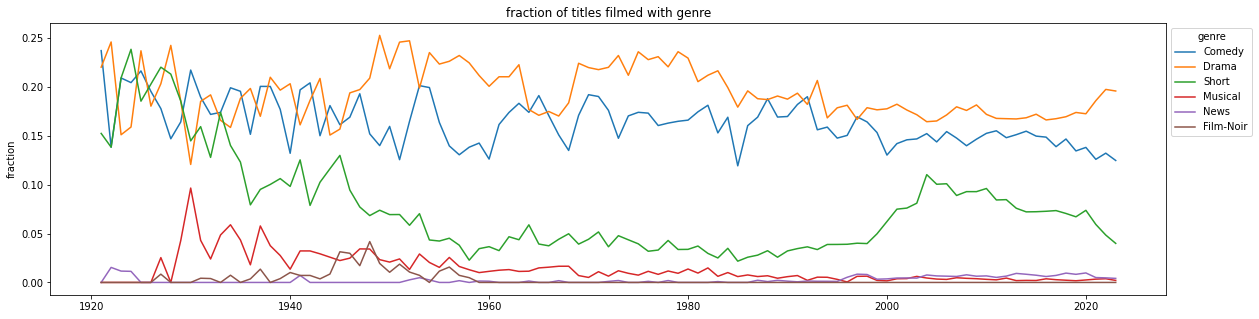

In [21]:
# influence of startYear attribute
fig, ax = plt.subplots(figsize = (20,5))
sub = counts[counts['startYear'] > 1920]
for genre in ['Comedy','Drama','Short','Musical','News','Film-Noir']:
  ax.plot(sub['startYear'], sub[genre], label = genre)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,bbox_to_anchor=(1, 1),loc = 2,title = 'genre' )
ax.set_title('fraction of titles filmed with genre')
ax.set_ylabel('fraction')

In [22]:
import seaborn as sns

In [23]:
# correlation with rating
atributes['genres'] = list(map(lambda x : x.split(',')[0], atributes['genres']))

Text(0.5, 1.0, 'Worst 3 rated genres')

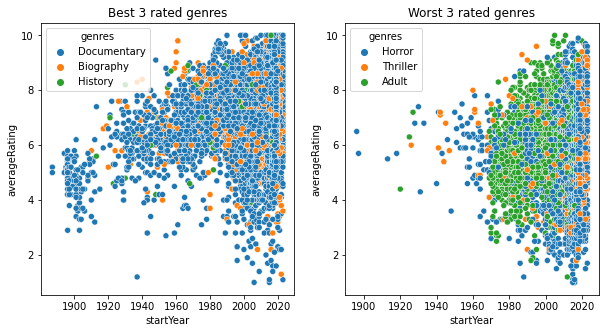

In [24]:
fig, ax = plt.subplots(1,2,figsize = (10, 5))

bestGenres = atributes[((atributes['genres'] == 'History') | (atributes['genres'] == 'Documentary') | (atributes['genres'] == 'Biography'))]
worstGenres = atributes[((atributes['genres'] == 'Horror') | (atributes['genres'] == 'Adult') | (atributes['genres'] == 'Thriller'))]

grid1 = sns.scatterplot(data = bestGenres, x = "startYear", y= "averageRating", hue = "genres", ax = ax[0])
grid1.set_title('Best 3 rated genres')
grid2 = sns.scatterplot(data = worstGenres, x = "startYear", y= "averageRating", hue = "genres", ax = ax[1])
grid2.set_title('Worst 3 rated genres')


In [25]:
# correlation of best and worst rated genres
print('correlation of averageRating of best 3 rated genres and StartYear:')
print(bestGenres['startYear'].corr(bestGenres['averageRating'], method = 'pearson'))

print('correlation of averageRating of worst 3 rated genres and StartYear:')
print(worstGenres['startYear'].corr(worstGenres['averageRating'], method = 'pearson'))

print('correlation of averageRating and StartYear in whole dataset:')
print(atributes['startYear'].corr(atributes['averageRating'], method = 'pearson'))

correlation of averageRating of best 3 rated genres and StartYear:
0.23345604401536457
correlation of averageRating of worst 3 rated genres and StartYear:
0.014207334179680606
correlation of averageRating and StartYear in whole dataset:
0.14632187980772113


#Rating over the years


In [26]:
filtered_movies = titles[(~titles['titleType'].isin(['short','tvMiniSeries','videoGame','video','tvShort','tvSpecial'])) & (titles['numVotes'] > 0)]
filtered_movies = filtered_movies.dropna(subset=['startYear'])

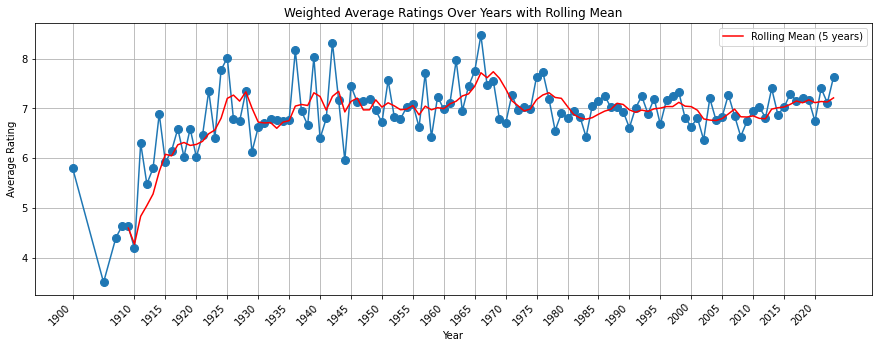

In [27]:
selected_columns = ['startYear', 'averageRating','numVotes']

selected_data = filtered_movies[selected_columns]

weighted_average_ratings_per_year = (selected_data['averageRating'] * selected_data['numVotes']).groupby(selected_data['startYear']).sum() / selected_data['numVotes'].groupby(selected_data['startYear']).sum()
rolling_mean = weighted_average_ratings_per_year.rolling(window=5).mean()

plt.figure(figsize=(15, 5))
plt.plot(weighted_average_ratings_per_year.index, weighted_average_ratings_per_year.values, marker='o', linestyle='-', markersize=8)
plt.plot(rolling_mean.index, rolling_mean.values, linestyle='-', color='red', label='Rolling Mean (5 years)')
plt.title('Weighted Average Ratings Over Years with Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()
plt.xticks(weighted_average_ratings_per_year.index[::5], rotation=45, ha='right')
plt.grid(True)
plt.show()

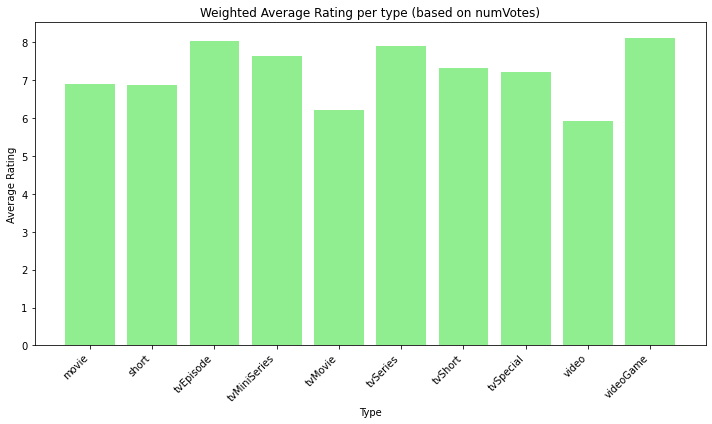

In [28]:
weighted_average_ratings_by_type = (titles['averageRating'] * titles['numVotes']).groupby(titles['titleType']).sum() / titles['numVotes'].groupby(titles['titleType']).sum()
weighted_average_ratings_by_type = weighted_average_ratings_by_type.reset_index()

plt.figure(figsize=(10, 6))
plt.bar(weighted_average_ratings_by_type['titleType'], weighted_average_ratings_by_type[0], color='lightgreen')
plt.title('Weighted Average Rating per type (based on numVotes)')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

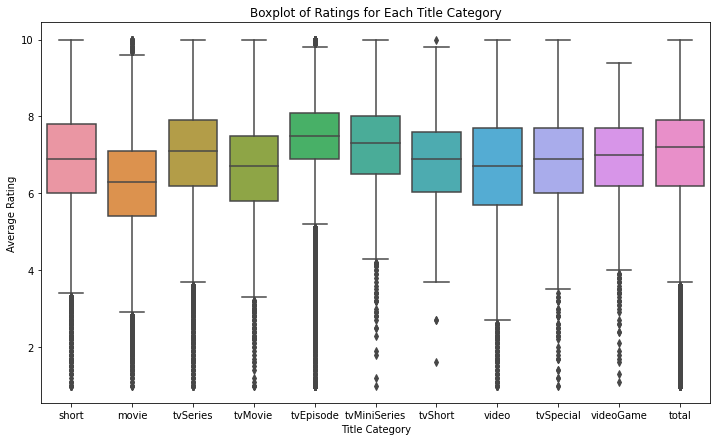

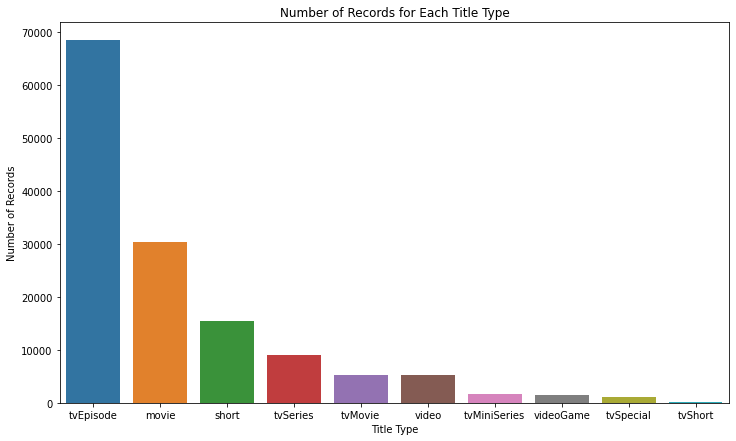

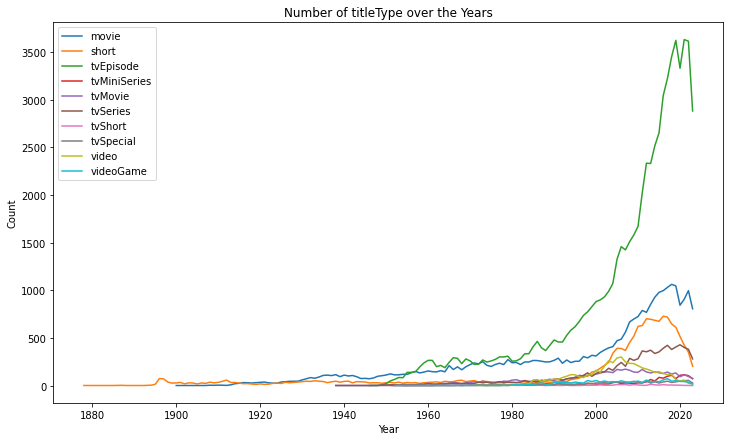

In [29]:
#JK
df_copy = titles.copy()
df_copy['titleType'] = 'total'
result_df = pd.concat([titles, df_copy], ignore_index=True)

plt.figure(figsize=(12, 7))
sns.boxplot(x='titleType', y='averageRating', data=result_df)
plt.title('Boxplot of Ratings for Each Title Category')
plt.xlabel('Title Category')
plt.ylabel('Average Rating')
plt.show()

title_counts = titles['titleType'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.title('Number of Records for Each Title Type')
plt.xlabel('Title Type')
plt.ylabel('Number of Records')
plt.show()

grouped_data = titles.groupby(['titleType', 'startYear']).size().reset_index(name='count')
plt.figure(figsize=(12, 7))

for title_type, data in grouped_data.groupby('titleType'):
    plt.plot(data['startYear'], data['count'], label=title_type)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of titleType over the Years')
plt.legend()
plt.show()

In [30]:
pivot_table = pd.pivot_table(titles, values='averageRating', index=titles.index, columns='titleType', aggfunc='mean')

binary_columns = pd.get_dummies(titles['titleType'], prefix='is_type')
titles_with_binary = pd.concat([titles[['averageRating']], binary_columns], axis=1)
display(titles_with_binary)

binary_columns_list = ['is_type_movie', 'is_type_short', 'is_type_tvEpisode', 'is_type_tvMiniSeries', 'is_type_tvMovie', 'is_type_tvSeries', 'is_type_tvShort', 'is_type_tvSpecial', 'is_type_video', 'is_type_videoGame']

correlation_matrix = titles_with_binary[['averageRating'] + binary_columns_list].corr().round(4)

selected_columns = correlation_matrix[['averageRating']]

display(selected_columns)

,averageRating,is_type_movie,is_type_short,is_type_tvEpisode,is_type_tvMiniSeries,is_type_tvMovie,is_type_tvSeries,is_type_tvShort,is_type_tvSpecial,is_type_video,is_type_videoGame
0,5.7,0,1,0,0,0,0,0,0,0,0
1,5.2,0,1,0,0,0,0,0,0,0,0
2,5.1,0,1,0,0,0,0,0,0,0,0
3,5.0,0,1,0,0,0,0,0,0,0,0
4,4.1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
138209,5.2,0,0,1,0,0,0,0,0,0,0
138210,7.2,0,0,1,0,0,0,0,0,0,0
138211,3.5,1,0,0,0,0,0,0,0,0,0
138212,7.4,0,0,1,0,0,0,0,0,0,0


,averageRating
averageRating,1.0000
is_type_movie,-0.2959
is_type_short,-0.0295
is_type_tvEpisode,0.3154
is_type_tvMiniSeries,0.0163
is_type_tvMovie,-0.0496
is_type_tvSeries,-0.0173
is_type_tvShort,-0.0063
is_type_tvSpecial,-0.0152
is_type_video,-0.0591


In [31]:
from scipy.stats import spearmanr

fraction = 1

random_sample = titles_with_binary.sample(frac=fraction, random_state=42)

eps = 0.05

positive_correlation_results = pd.DataFrame(columns=['x', 'statistic', 'pvalue'])
negative_correlation_results = pd.DataFrame(columns=['x', 'statistic', 'pvalue'])

for x in binary_columns:
    res_pos = spearmanr(random_sample['averageRating'], random_sample[x], alternative='greater')
    if res_pos.pvalue < eps:
        positive_correlation_results = pd.concat([positive_correlation_results, pd.DataFrame({'x': [x], 'statistic': [res_pos.statistic], 'pvalue': [res_pos.pvalue]})])

    res_neg = spearmanr(random_sample['averageRating'], random_sample[x], alternative='less')
    if res_neg.pvalue < eps:
        negative_correlation_results = pd.concat([negative_correlation_results, pd.DataFrame({'x': [x], 'statistic': [res_neg.statistic], 'pvalue': [res_neg.pvalue]})])

display(positive_correlation_results)
display(negative_correlation_results)

TypeError: spearmanr() got an unexpected keyword argument 'alternative'

# **PCA a Clustering**

Zoberieme 10K najlepsich dat podla `numVotes` kedze tie davaju vacsiu vierohodnost `averageRating` a tiez aby sme redukovali pocet `NaN`s z povodneho datasetu pre stlpce `runtimeMinutes` a `directors`

In [32]:
top_10K = titles.sort_values('numVotes', ascending=False).head(1000)
print("Podiel NaN hodnot v %")
pd.DataFrame(top_10K.isna().sum()/top_10K.count() * 100, columns=['% of NaN'])

Podiel NaN hodnot v %


,% of NaN
tconst,0.000000
titleType,0.000000
primaryTitle,0.000000
startYear,0.000000
runtimeMinutes,0.806452
genres,0.000000
directors,0.200401
writers,1.010101
averageRating,0.000000
numVotes,0.000000


vyhodime teda `NaN`s kedze ich podiel nie je velky, teraz dostavame **9274 filmov**

In [33]:
top_10K.dropna(axis=0,inplace=True)
print(top_10K.isna().sum())
top_10K

tconst            0
titleType         0
primaryTitle      0
startYear         0
runtimeMinutes    0
genres            0
directors         0
writers           0
averageRating     0
numVotes          0
dtype: int64


,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
45204,tt0993846,movie,The Wolf of Wall Street,2013.0,180.0,"Biography,Comedy,Crime",nm0000217,"nm1010540,nm0067789",8.2,1537499
16258,tt0266697,movie,Kill Bill: Vol. 1,2003.0,111.0,"Action,Crime,Thriller",nm0000233,"nm0000233,nm0000235",8.2,1170680
67812,tt1431045,movie,Deadpool,2016.0,108.0,"Action,Comedy",nm1783265,"nm1014201,nm1116660",8.0,1101017
124912,tt6751668,movie,Parasite,2019.0,132.0,"Drama,Thriller",nm0094435,"nm0094435,nm8243301",8.5,911721
77043,tt1663202,movie,The Revenant,2015.0,156.0,"Action,Adventure,Drama",nm0327944,"nm1872664,nm0327944,nm3488559",8.0,855008
...,...,...,...,...,...,...,...,...,...,...
22938,tt0413015,movie,Mrs. Henderson Presents,2005.0,103.0,"Comedy,Drama,Music",nm0001241,"nm1070948,nm1747206,nm0792526,nm4157046",7.0,16285
91051,tt2281159,movie,Contracted,2013.0,84.0,"Drama,Horror,Thriller",nm3146718,nm3146718,5.3,16206
6627,tt0091799,movie,Psycho III,1986.0,93.0,"Horror,Mystery,Thriller",nm0000578,"nm0688279,nm0088645",5.5,16196
64669,tt13651628,movie,Belle,2021.0,121.0,"Adventure,Animation,Drama",nm0396074,nm0396074,7.1,16194


In [34]:
selected_cols = ['tconst','primaryTitle', 'titleType', 'startYear', 'runtimeMinutes', 'genres', 'numVotes','averageRating']

sel = top_10K.loc[:, selected_cols]

dummy_auto = ['titleType', 'genres']
info = ['tconst','primaryTitle']
sel

,tconst,primaryTitle,titleType,startYear,runtimeMinutes,genres,numVotes,averageRating
45204,tt0993846,The Wolf of Wall Street,movie,2013.0,180.0,"Biography,Comedy,Crime",1537499,8.2
16258,tt0266697,Kill Bill: Vol. 1,movie,2003.0,111.0,"Action,Crime,Thriller",1170680,8.2
67812,tt1431045,Deadpool,movie,2016.0,108.0,"Action,Comedy",1101017,8.0
124912,tt6751668,Parasite,movie,2019.0,132.0,"Drama,Thriller",911721,8.5
77043,tt1663202,The Revenant,movie,2015.0,156.0,"Action,Adventure,Drama",855008,8.0
...,...,...,...,...,...,...,...,...
22938,tt0413015,Mrs. Henderson Presents,movie,2005.0,103.0,"Comedy,Drama,Music",16285,7.0
91051,tt2281159,Contracted,movie,2013.0,84.0,"Drama,Horror,Thriller",16206,5.3
6627,tt0091799,Psycho III,movie,1986.0,93.0,"Horror,Mystery,Thriller",16196,5.5
64669,tt13651628,Belle,movie,2021.0,121.0,"Adventure,Animation,Drama",16194,7.1


# Selecting top words in title

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tfidf_matrix = vectorizer.fit_transform(sel['primaryTitle'])


feature_names = vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
top_words = df_tfidf.mean().sort_values(ascending=False)[:40].index.tolist()

top_meaningful = list(filter(lambda x:len(x)>3, top_words))
# Print the top words
print("Top words:", top_meaningful)

Top words: ['night', 'love', 'house', 'black', 'part', 'life', 'with', 'star', 'christmas', 'movie', 'game', 'america', 'time', 'perfect', 'dead', 'from', 'evil', 'world', 'girls']


In [36]:
dummy_dfs = []
for dum, pref in zip(dummy_auto, ('type:', 'genre:')):
  dummy_dfs.append(sel[dum].str.get_dummies(sep=',').add_prefix(pref))


In [37]:

df_new = pd.concat([sel.drop(dummy_auto, axis=1), *dummy_dfs], axis=1)

(df_new)


,tconst,primaryTitle,startYear,runtimeMinutes,numVotes,averageRating,type:movie,type:short,type:tvEpisode,type:tvMiniSeries,...,genre:Musical,genre:Mystery,genre:Reality-TV,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Talk-Show,genre:Thriller,genre:War,genre:Western
45204,tt0993846,The Wolf of Wall Street,2013.0,180.0,1537499,8.2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16258,tt0266697,Kill Bill: Vol. 1,2003.0,111.0,1170680,8.2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
67812,tt1431045,Deadpool,2016.0,108.0,1101017,8.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124912,tt6751668,Parasite,2019.0,132.0,911721,8.5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
77043,tt1663202,The Revenant,2015.0,156.0,855008,8.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22938,tt0413015,Mrs. Henderson Presents,2005.0,103.0,16285,7.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91051,tt2281159,Contracted,2013.0,84.0,16206,5.3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6627,tt0091799,Psycho III,1986.0,93.0,16196,5.5,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
64669,tt13651628,Belle,2021.0,121.0,16194,7.1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
for top in top_meaningful:
  df_new[top] = (df_new['primaryTitle'].str.contains(top)).astype(int)


In [39]:
to_PCA = df_new.drop(info, axis=1)
to_PCA

,startYear,runtimeMinutes,numVotes,averageRating,type:movie,type:short,type:tvEpisode,type:tvMiniSeries,type:tvMovie,type:tvSeries,...,movie,game,america,time,perfect,dead,from,evil,world,girls
45204,2013.0,180.0,1537499,8.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16258,2003.0,111.0,1170680,8.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67812,2016.0,108.0,1101017,8.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124912,2019.0,132.0,911721,8.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77043,2015.0,156.0,855008,8.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22938,2005.0,103.0,16285,7.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91051,2013.0,84.0,16206,5.3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6627,1986.0,93.0,16196,5.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64669,2021.0,121.0,16194,7.1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(to_PCA) # normalizing
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.502974,0.238929,10.366514,1.172991,0.483696,-0.055385,-0.231745,-0.128765,-0.063986,-0.344363,...,0.0,0.0,0.0,-0.031944,0.0,0.0,-0.055385,-0.071575,-0.031944,-0.045198
1,-0.113413,-0.015034,7.730031,1.172991,0.483696,-0.055385,-0.231745,-0.128765,-0.063986,-0.344363,...,0.0,0.0,0.0,-0.031944,0.0,0.0,-0.055385,-0.071575,-0.031944,-0.045198
2,0.687890,-0.026076,7.229334,0.993852,0.483696,-0.055385,-0.231745,-0.128765,-0.063986,-0.344363,...,0.0,0.0,0.0,-0.031944,0.0,0.0,-0.055385,-0.071575,-0.031944,-0.045198
3,0.872806,0.062259,5.868783,1.441701,0.483696,-0.055385,-0.231745,-0.128765,-0.063986,-0.344363,...,0.0,0.0,0.0,-0.031944,0.0,0.0,-0.055385,-0.071575,-0.031944,-0.045198
4,0.626251,0.150594,5.461163,0.993852,0.483696,-0.055385,-0.231745,-0.128765,-0.063986,-0.344363,...,0.0,0.0,0.0,-0.031944,0.0,0.0,-0.055385,-0.071575,-0.031944,-0.045198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,0.009865,-0.044479,-0.567093,0.098153,0.483696,-0.055385,-0.231745,-0.128765,-0.063986,-0.344363,...,0.0,0.0,0.0,-0.031944,0.0,0.0,-0.055385,-0.071575,-0.031944,-0.045198
977,0.502974,-0.114411,-0.567661,-1.424536,0.483696,-0.055385,-0.231745,-0.128765,-0.063986,-0.344363,...,0.0,0.0,0.0,-0.031944,0.0,0.0,-0.055385,-0.071575,-0.031944,-0.045198
978,-1.161270,-0.081285,-0.567733,-1.245396,0.483696,-0.055385,-0.231745,-0.128765,-0.063986,-0.344363,...,0.0,0.0,0.0,-0.031944,0.0,0.0,-0.055385,-0.071575,-0.031944,-0.045198
979,0.996083,0.021772,-0.567747,0.187722,0.483696,-0.055385,-0.231745,-0.128765,-0.063986,-0.344363,...,0.0,0.0,0.0,-0.031944,0.0,0.0,-0.055385,-0.071575,-0.031944,-0.045198


In [41]:
from sklearn import decomposition
pca = decomposition.PCA(.8) # 80% variance
pca_attr = pca.fit_transform(x)

In [42]:
print(len(pca.explained_variance_ratio_))
pca.explained_variance_ratio_

33


array([0.05913779, 0.04321477, 0.0400268 , 0.03324488, 0.03017729,
       0.0283508 , 0.02734523, 0.0269287 , 0.02567192, 0.02446341,
       0.0240106 , 0.02377616, 0.02321508, 0.02246956, 0.02201761,
       0.02164579, 0.02132184, 0.02098319, 0.0208062 , 0.02064849,
       0.02062214, 0.0204961 , 0.02040736, 0.02034518, 0.02022791,
       0.02003127, 0.01984045, 0.01968885, 0.01937302, 0.01912802,
       0.01886162, 0.01849477, 0.01796786])

In [43]:
comps = pca.components_[0]
comps_weights = pd.DataFrame(list(zip(comps, to_PCA.columns)), columns=['weights', 'features'])
comps_weights['abs_weights']=comps_weights['weights'].apply(lambda x: np.abs(x))
comps_weights.sort_values('abs_weights', ascending=False,inplace=True)

Top_38_features=comps_weights
Top_38_features

,weights,features,abs_weights
4,-0.459178,type:movie,0.459178
14,0.366944,genre:Adventure,0.366944
15,0.365142,genre:Animation,0.365142
6,0.323446,type:tvEpisode,0.323446
13,0.303529,genre:Action,0.303529
3,0.277332,averageRating,0.277332
9,0.262228,type:tvSeries,0.262228
31,-0.182392,genre:Romance,0.182392
0,0.166592,startYear,0.166592
20,-0.156904,genre:Drama,0.156904


C:\Users\kancu\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\kancu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

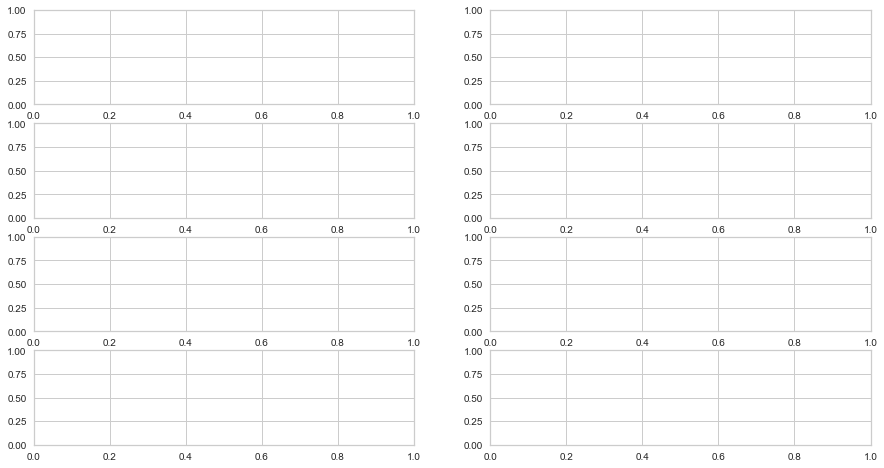

In [46]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

Xpca=pca.transform(to_PCA)

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in range(2,10):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++',max_iter=1000,
                  verbose=False)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(Xpca)

Zdá sa, že v každom pri každom počte clusterov nám vzniká jeden veľký bin a teda sa sústreďujeme najmä na dobré skóre a ako-takú rozmanitosť veľkosti clusterov. To nás vedie k voľbe medzi 4 a 5 a keďže 5 má väčšiu rozmanitosť a podobnú silhuette tak volíme **5**. Vyšší počet nám už dáva oveľa nižšie silhuette skóre.

In [47]:
#Clustering with kmeans as k=5
n_clus = 5
Xpca=pca.transform(to_PCA)

from sklearn.cluster import MiniBatchKMeans
km=KMeans(n_clusters=n_clus,init='k-means++',max_iter=1000,n_init=1000,
                  verbose=False)

km_model=km.fit(Xpca)
kmeanclusters = km.predict(Xpca)
kmeandistances = km.transform(Xpca)

C:\Users\kancu\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [48]:
film_cluster = { 'tconst': list(df_new['tconst']),'cluster': km.labels_}

frame_kmeans = pd.DataFrame(film_cluster, index = [km.labels_] , columns = ['tconst', 'cluster'])

frame_kmeans['cluster'].value_counts() #number of films per cluster

AttributeError: 'KMeans' object has no attribute 'labels_'

In [49]:
frame_kmeans

NameError: name 'frame_kmeans' is not defined

In [50]:
final = pd.merge(frame_kmeans, titles)
final

NameError: name 'frame_kmeans' is not defined

In [51]:
pom_df = {'cluster':[],
          'avgRating':[],
          'pocFilmov':[]}
for cluster in range(n_clus):
  pom_df['cluster'].append(cluster)
  pom_df['avgRating'].append(final.loc[final['cluster']==cluster,'averageRating'].mean())
  pom_df['pocFilmov'].append(final.loc[final['cluster']==cluster,'averageRating'].count())

pd.DataFrame(pom_df).sort_values('avgRating', ascending=False)

NameError: name 'final' is not defined

In [52]:
final['genres'].str.get_dummies(',').sum().sort_values(ascending=False)

NameError: name 'final' is not defined

V clusteroch s menším počtom prvkov sme dostali vyššie priemery ako v tých s väčšou početnosťou a teda vyzerá, že dostávame clustre v ktorých sú filmy s lepším hodnotením a teda sa môžeme pozrieť na jednotlivé vlastnosti filmov

In [53]:
cl3 = final[final['cluster']==3]
cl3

NameError: name 'final' is not defined

In [54]:
cl3['runtimeMinutes'].median()

NameError: name 'cl3' is not defined

In [55]:
cl3['genres'].str.get_dummies(',').sum().sort_values(ascending=False)

NameError: name 'cl3' is not defined

In [56]:
cl1= final[final['cluster']==1]
cl1

NameError: name 'final' is not defined

In [57]:
cl1['genres'].str.get_dummies(',').sum().sort_values(ascending=False)

NameError: name 'cl1' is not defined

In [58]:
print(cl1['runtimeMinutes'].median(),cl1['startYear'].median())

NameError: name 'cl1' is not defined

In [59]:
cl4 = final[final['cluster']==4]
cl4

NameError: name 'final' is not defined

In [60]:
cl4['genres'].str.get_dummies(',').sum().sort_values(ascending=False)

NameError: name 'cl4' is not defined

In [61]:
print(cl4['runtimeMinutes'].median(),cl4['startYear'].median())

NameError: name 'cl4' is not defined

In [62]:
for clust in cl1, cl4:
  print(clust.sort_values('averageRating', ascending=False)['directors'].str.get_dummies(',').sum().sort_values(ascending=False).head(5))

NameError: name 'cl1' is not defined

In [63]:
cl3.sort_values('averageRating', ascending=False)['directors'].head(5)

NameError: name 'cl3' is not defined

In [64]:
for clust in cl3, cl1, cl4:
  print(clust['titleType'].str.get_dummies(',').sum().sort_values(ascending=False).head(5))

NameError: name 'cl3' is not defined

In [65]:
for per in "nm0001466","nm0094435","nm0000217","nm0000233","nm1218281", 'nm0000229','nm0001093', 'nm0000318':
  print(per, ": ", persons[persons['nconst'] == per]['primaryName'])


nm0001466 :  1439    Sergio Leone
Name: primaryName, dtype: object
nm0094435 :  20557    Bong Joon Ho
Name: primaryName, dtype: object
nm0000217 :  213    Martin Scorsese
Name: primaryName, dtype: object
nm0000233 :  229    Quentin Tarantino
Name: primaryName, dtype: object
nm1218281 :  203818    Jon Watts
Name: primaryName, dtype: object
nm0000229 :  225    Steven Spielberg
Name: primaryName, dtype: object
nm0001093 :  1071    John Dahl
Name: primaryName, dtype: object
nm0000318 :  313    Tim Burton
Name: primaryName, dtype: object


### Co robi filmy oblubenymi? Ludia

In [66]:
df = pd.DataFrame(principals)

pivot_df = pd.pivot_table(df, values='nconst', index='tconst', columns='category', aggfunc=lambda x: ', '.join(x)).reset_index()

# Rename the columns
pivot_df.columns.name = None  # Remove the 'category' label from columns

In [67]:
pivot_df.drop(["self", "archive_footage", "archive_sound", "cinematographer", "editor", "production_designer"], axis=1, inplace=True)
pivot_df

,tconst,actor,actress,composer,director,producer,writer
0,tt0000001,NaN,NaN,NaN,nm0005690,NaN,NaN
1,tt0000011,nm3692297,NaN,NaN,nm0804434,NaN,NaN
2,tt0000022,NaN,NaN,NaN,nm0525910,NaN,NaN
3,tt0000032,NaN,nm3692479,NaN,nm0804434,NaN,NaN
4,tt0000042,NaN,NaN,NaN,nm0617588,NaN,NaN
...,...,...,...,...,...,...,...
135901,tt9916120,nm6185247,NaN,"nm2514440, nm3328646",NaN,nm4795891,NaN
135902,tt9916220,NaN,NaN,NaN,NaN,NaN,NaN
135903,tt9916428,"nm3611859, nm9445072, nm8594703, nm8680851, nm...",nm0422639,NaN,nm0910951,NaN,NaN
135904,tt9916578,"nm0388243, nm12070927","nm0358200, nm0006522",NaN,nm0373673,nm1876061,"nm1485603, nm1485604, nm1866876, nm0909144"
